# 다중분류

- 다중분류는 이진분류의 확장적 개념 

- 전반적인 과정은 동일하나 클래스가 여러 개이므로 모델 평가시 다양한 지표를 확인해야 함

- 이진 분류(Binary Classification)는 타깃의 값이 어떤 기준에 대하여 참(True) 또는 거짓(False)의 값을 가졌습니다. 다중 분류(Multiclass Classification)의 경우 타깃이 가질 수 있는 값이 3개 이상입니다. 타깃이 가지는 값에 대응되는 데이터의 모임을 클래스(class) 혹은 레이블(label)이라고 하기도 합니다. 다중 분류의 경우 단일 레이블 분류(single-label classification)에 속합니다. 즉, 입력값 하나당 하나의 클래스에만 대응될 수 있습니다. 이와 반대로 하나의 입력값이 여러 개의 클래스에 대응되는 경우 다중 레이블 분류(multi-label classification)이라고 합니다.


- 예를 들어 숫자는 0부터 9까지 총 10개가 있습니다. 만일 손으로 쓴 숫자 데이터 세트에 대하여
- 입력으로 받은 숫자 사진이 0인지 아닌지 분류하는 것은 이진 분류 모델을,
- 입력으로 받은 숫자 사진이 0부터 9 중 어떤 숫자인지 분류하는 것은 다중 분류 모델을 사용합니다.

> gender.male,	gender.female,	region.Sudo,	region.Chungcheung,	region.Honam,	region.Youngnam,	region.Others,	edu	income,	age,	score_gov(정부지지도),	score_progress(진보성향),	score_intention(정치관심도) 등을 독립변수로 두고 parties(지지정당(4집단))을 종속변수로 둔다.

In [1]:
data<-read.csv("data/Fvote.csv", header=TRUE)
data<-data[ , c(2:14, 16)]
data$parties<-factor(data$parties, labels=c("A", "B", "C", "D"))
head(data)

gender.male,gender.female,region.Sudo,region.Chungcheung,region.Honam,region.Youngnam,region.Others,edu,income,age,score_gov,score_progress,score_intention,parties
1,0,0,0,0,1,0,1.0,0.6666667,0.6666667,0.25,0.25,0.75,B
1,0,0,0,0,0,1,0.5,0.6666667,0.6666667,0.25,0.75,0.50,C
1,0,0,0,1,0,0,0.0,0.3333333,1.0000000,0.00,0.50,0.45,D
0,1,1,0,0,0,0,0.5,0.0000000,0.6666667,1.00,0.75,0.40,A
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.75,0.50,0.35,A
1,0,1,0,0,0,0,0.0,0.3333333,1.0000000,0.00,0.75,0.70,B


## train / test dataset 나누기


In [2]:

library(caret)


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2


In [3]:
# set.seed(42)
training.samples <- createDataPartition(data$parties, p = 0.7, list = FALSE)
training.samples


Resample1
1
4
7
8
9
10
12
13
14
16


In [4]:

train  <- data[training.samples, ]
test <- data[-training.samples, ]

## 모델탐색

###  TrainControl 및 기본 모델 훈련 (Accuracy 기준)


### Grid search

In [5]:
train.control <- trainControl(method = "repeatedcv", 
                              number = 5, 
                              repeats = 10)

In [6]:
knnGrid <-  expand.grid(k=1:20)

In [7]:
TrainModel1 <- train(parties ~ ., data = train, 
                     method = "knn", 
                     trControl = train.control, 
                     metric = "Accuracy", # 또는 "ROC": trainControl 설정에 따라 다름
                     tuneGrid = knnGrid)
TrainModel1

k-Nearest Neighbors 

150 samples
 13 predictor
  4 classes: 'A', 'B', 'C', 'D' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 119, 119, 120, 121, 121, 121, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   1  0.3197463  0.05309142
   2  0.3035808  0.02967173
   3  0.3091099  0.02478762
   4  0.3369120  0.04978305
   5  0.3459969  0.05715296
   6  0.3530671  0.06047131
   7  0.3609377  0.06716930
   8  0.3709441  0.07458165
   9  0.3860943  0.09272430
  10  0.3964056  0.10039119
  11  0.3938217  0.08830303
  12  0.3774430  0.05869860
  13  0.3781573  0.05249315
  14  0.3887674  0.06503987
  15  0.3807750  0.04862031
  16  0.3888900  0.05886464
  17  0.3981662  0.07147006
  18  0.4008482  0.07214838
  19  0.4119000  0.08782523
  20  0.4025283  0.07020280

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 19.

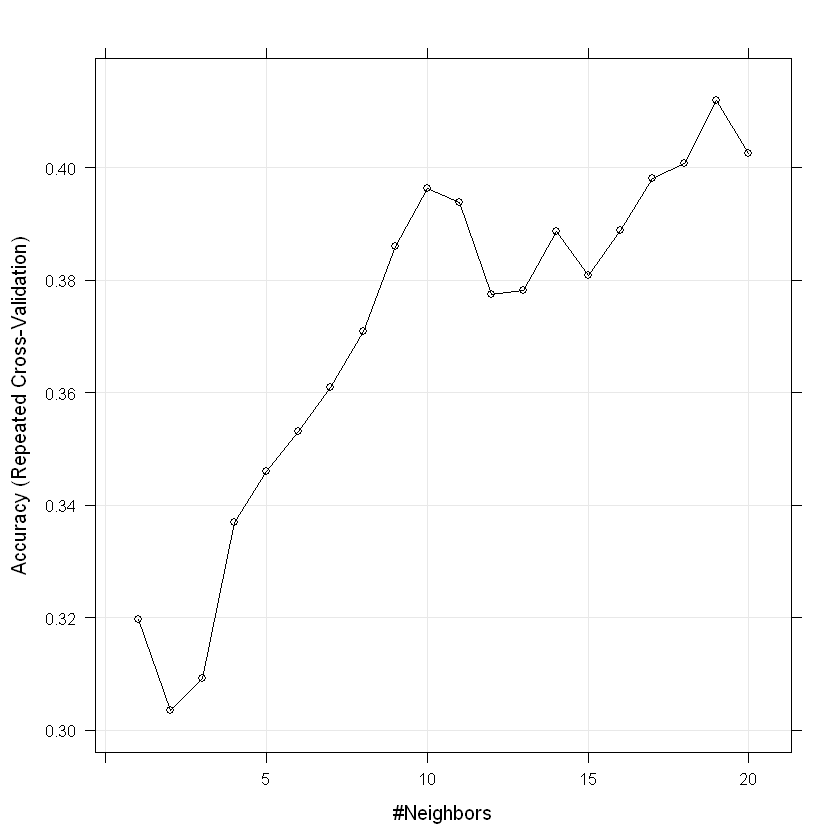

In [8]:
#그래프
trellis.par.set(caretTheme())
plot(TrainModel1) 


### 랜덤 서치 (random search)

In [9]:
train.control3 <- trainControl(method = "repeatedcv",
                              number = 5,
                              repeats = 10,
                              search = "random")

TrainModel3 <- train(parties ~ ., data = train, 
                     method = "knn",
                     metric = "Accuracy",
                     tuneLength = 30,
                     trControl = train.control3)
TrainModel3

k-Nearest Neighbors 

150 samples
 13 predictor
  4 classes: 'A', 'B', 'C', 'D' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 120, 119, 121, 120, 120, 121, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   1  0.3237564  0.05965846
   5  0.3520768  0.06062143
   9  0.3953112  0.10618590
  13  0.3954522  0.08294469
  17  0.3841361  0.05010581
  21  0.4028747  0.06712008
  25  0.4087487  0.07523167
  29  0.4149281  0.07825934
  33  0.3994063  0.04209098
  37  0.3975412  0.03248844
  41  0.3921821  0.02059892
  45  0.3978260  0.02793565

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 29.

### 다소 심플한 모델의 탐색


In [10]:
whichTwoPct <- tolerance(TrainModel3$results, metric = "Accuracy", tol = 2, maximize = TRUE)  
cat("best model within 2 pct of best:\n")
TrainModel3$results[whichTwoPct,1:5]

best model within 2 pct of best:


,k,Accuracy,Kappa,AccuracySD,KappaSD
7,25,0.4087487,0.07523167,0.04360566,0.06689507


> 위에서 훈련데이터 정확도가 높은 k값을 세가지방법을 이용해서 찾았다. 
Grid Search에서 찾은 k값, random search에서 찾은 k값, 다소 심플한 모델의 탐색에서 찾은 k값, 총 3가지 k값을 최종모델의 선택에서 tuneGrid = data.frame(k=)에 각각 k값을 대입해서 모델평가를 하여 가장 좋은 k값을 찾아낸다.

> 위에서 찾은 k값 19(Grid search), 29(random search), 25(다소 심플한 모델)을 밑에 FinalModel 변수에 
tuneGrid = data.frame(k=)의 k값을 변경해주면서 훈련데이터 정확도와 테스트정확도가 높고 둘의 차이가 거의 없는 최상의 k값을 찾아 k값을 결정해주면 된다.

### 최종모델의 선택


In [11]:
finalControl <- trainControl(method = "none", classProbs = TRUE)


In [41]:
FinalModel <- train(parties ~ ., data = train, 
                    method = "knn", 
                    trControl = finalControl, 
                    tuneGrid = data.frame(k=25),
                    metric = "Accuracy")
FinalModel

k-Nearest Neighbors 

150 samples
 13 predictor
  4 classes: 'A', 'B', 'C', 'D' 

No pre-processing
Resampling: None 

### 모델 평가

#### 훈련 모델의 예측 Class 측정


In [42]:
train_pred<-predict(FinalModel, train)


In [43]:
confusionMatrix(data = train_pred, reference = train$parties)


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D
         A  5  2  4  3
         B  2 11  2  2
         C  0  0  0  3
         D 28 25 12 51

Overall Statistics
                                          
               Accuracy : 0.4467          
                 95% CI : (0.3655, 0.5299)
    No Information Rate : 0.3933          
    P-Value [Acc > NIR] : 0.1055          
                                          
                  Kappa : 0.1394          
                                          
 Mcnemar's Test P-Value : 2.758e-09       

Statistics by Class:

                     Class: A Class: B Class: C Class: D
Sensitivity           0.14286  0.28947   0.0000   0.8644
Specificity           0.92174  0.94643   0.9773   0.2857
Pos Pred Value        0.35714  0.64706   0.0000   0.4397
Neg Pred Value        0.77941  0.79699   0.8776   0.7647
Prevalence            0.23333  0.25333   0.1200   0.3933
Detection Rate        0.03333  0.07333   0.0000   0.3400
Det

In [24]:
confusionMatrix(data = train_pred, reference = train$parties, mode = "prec_recall")


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D
         A  5  2  6  1
         B  2  8  2  2
         C  0  0  0  2
         D 28 28 10 54

Overall Statistics
                                          
               Accuracy : 0.4467          
                 95% CI : (0.3655, 0.5299)
    No Information Rate : 0.3933          
    P-Value [Acc > NIR] : 0.1055          
                                          
                  Kappa : 0.1331          
                                          
 Mcnemar's Test P-Value : 2.813e-11       

Statistics by Class:

                     Class: A Class: B Class: C Class: D
Precision             0.35714  0.57143  0.00000   0.4500
Recall                0.14286  0.21053  0.00000   0.9153
F1                    0.20408  0.30769      NaN   0.6034
Prevalence            0.23333  0.25333  0.12000   0.3933
Detection Rate        0.03333  0.05333  0.00000   0.3600
Detection Prevalence  0.09333  0.09333  0.01333   0.8000
Bal

In [25]:
postResample(pred = train_pred, obs = train$parties)


Accuracy     Kappa 
0.4466667 0.1331291

#### 테스트 모델의 예측 Class 측정


In [44]:

test_pred<-predict(FinalModel, test)


In [45]:
confusionMatrix(data = test_pred, reference = test$parties)


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D
         A  2  0  3  0
         B  1  4  1  0
         C  0  0  0  0
         D 12 11  3 24

Overall Statistics
                                         
               Accuracy : 0.4918         
                 95% CI : (0.3614, 0.623)
    No Information Rate : 0.3934         
    P-Value [Acc > NIR] : 0.0758         
                                         
                  Kappa : 0.1974         
                                         
 Mcnemar's Test P-Value : 2.535e-05      

Statistics by Class:

                     Class: A Class: B Class: C Class: D
Sensitivity           0.13333  0.26667   0.0000   1.0000
Specificity           0.93478  0.95652   1.0000   0.2973
Pos Pred Value        0.40000  0.66667      NaN   0.4800
Neg Pred Value        0.76786  0.80000   0.8852   1.0000
Prevalence            0.24590  0.24590   0.1148   0.3934
Detection Rate        0.03279  0.06557   0.0000   0.3934
Detection Pr

In [28]:
confusionMatrix(data = test_pred, reference = test$parties, mode = "prec_recall")


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D
         A  3  0  2  0
         B  1  3  1  1
         C  0  0  1  0
         D 11 12  3 23

Overall Statistics
                                         
               Accuracy : 0.4918         
                 95% CI : (0.3614, 0.623)
    No Information Rate : 0.3934         
    P-Value [Acc > NIR] : 0.0757969      
                                         
                  Kappa : 0.2031         
                                         
 Mcnemar's Test P-Value : 0.0001268      

Statistics by Class:

                     Class: A Class: B Class: C Class: D
Precision             0.60000  0.50000  1.00000   0.4694
Recall                0.20000  0.20000  0.14286   0.9583
F1                    0.30000  0.28571  0.25000   0.6301
Prevalence            0.24590  0.24590  0.11475   0.3934
Detection Rate        0.04918  0.04918  0.01639   0.3770
Detection Prevalence  0.08197  0.09836  0.01639   0.8033
Balanced Acc

In [29]:
postResample(pred = test_pred, obs = test$parties)

Accuracy     Kappa 
0.4918033 0.2031184

> k값을 바꾸면서 훈련데이터 , 테스트데이터 정확도를 측정하였다. k가 19일때 훈련데이터 0.45, 테스트데이터 0.42, k가 29일때 훈련데이터 0.46, 테스트데이터 0.49,
k가 25일때 훈련데이터 0.44, 테스트데이터 0.49 정확도가 나왔다.


> 결론적으로 훈련데이터와 테스트데이터 정확도 차이가 거의 없고 가장 정확도가 높은 k값은 29이다.
